# Experiments

The [experiments source folder](https://github.com/jupyterlab/benchmarks/tree/master/experiments) contains code useful to find the root cause of the issues.

## Simple Notebook

## Editor Comparison

We compare for different editor technologies the time (in seconds) needed to receive the `DOMContentLoaded` event for 1000 editors.

- 1000 CodeMirrors: 50 seconds.
- 1000 JupyterLab Cells: 50 seconds.
- 1000 JupyterLab Cells in a Lumino BoxPanel: 10 seconds for DOMContentLoaded, cells are only shown after 140 seconds.
- 1000 Monaco: 40 seconds for DOMContentLoaded, editors are only shown after 60 seconds.
- 1000 ProseMirror (basic version): 2 seconds.
- 1000 ReMirror: 50 seconds.

The time measures from 1 to 1000 CodeMirror editors show an exponential nature.

![](images/codemirrors.png "")

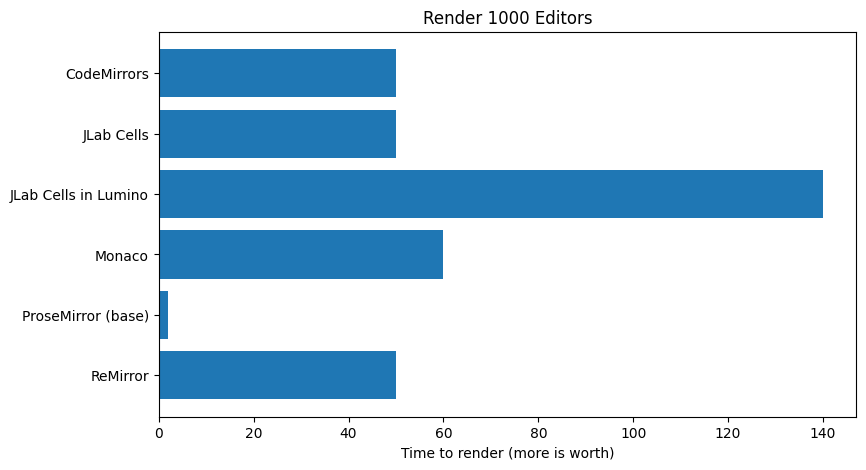

In [28]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(9,5))

"""
1000 JupyterLab Cells: 50 seconds.
1000 JupyterLab Cells in a Lumino BoxPanel: 10 seconds for DOMContentLoaded, cells are only shown after 140 seconds.
1000 CodeMirrors: 50 seconds.
1000 Monaco: 40 seconds for DOMContentLoaded, editors are only shown after 60 seconds.
1000 ProseMirror (basic version): 2 seconds.
1000 ReMirror: 50 seconds.
"""
exp = ('CodeMirrors', 'JLab Cells', 'JLab Cells in Lumino', 'Monaco', 'ProseMirror (base)', 'ReMirror')
y_pos = np.arange(len(exp))
performance = [50,50,140,60,2,50]
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(exp)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Time to render (more is worth)')
ax.set_title('Render 1000 Editors')
plt.savefig('./../../../decks/root-causes/images/exp.png')
plt.show()

## CSS `contain`

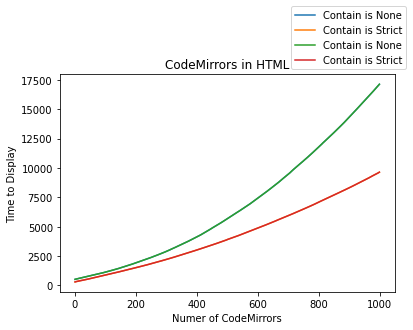

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./exp/codemirror-contain.csv')
df.set_index('cell-id', inplace=True)

def plot():
    plt.title('CodeMirrors in HTML')
    plt.xlabel('Numer of CodeMirrors')
    plt.ylabel('Time to Display')
    plt.plot(df['contain=none'], label = 'Contain is None')
    plt.plot(df['contain=strict'], label = 'Contain is Strict')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')

plot()
plt.savefig('./../../../decks/root-causes/images/codemirror-contain.png')
plot()
plt.show()

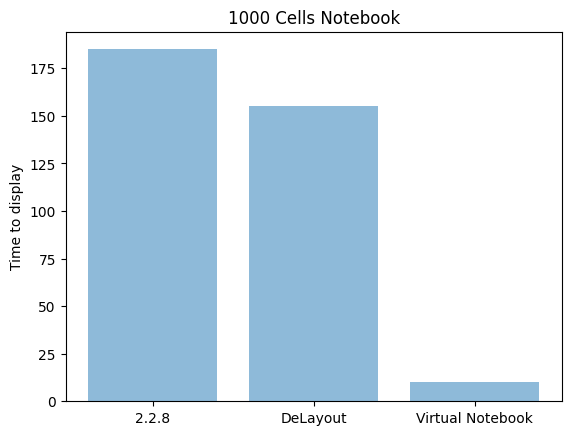

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

y_pos = ('2.2.8', 'DeLayout', 'Virtual Notebook')
performance = [185, 155, 10]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.ylabel('Time to display')
plt.title('1000 Cells Notebook')

plt.savefig('./../../../decks/root-causes/images/fixes-comparison.png')
plt.show()

## Lumino actions on resize

- https://github.com/jupyterlab/lumino/blob/master/packages/widgets/src/widget.ts#L610  
- https://github.com/jupyterlab/jupyterlab/search?q=onResize  
- https://github.com/jupyterlab/lumino/search?q=onResize  